삼성전자주식과 비트코인 상관관계 및 미래 예측(다음달-회귀)
1. 목표 설정
  1. Y : 미래 30일의 국내 특정 주식과 비트코인의 종가
  1. X : 최근 60일간의 데이터
    1. step : 하루 간격
    1. 양 : 1년(2018년 6월 ~ 2019년 6월)
1. 데이터 획득
  1. 국내 기업 1개, 비트코인
1. 데이터 정제 
  1. 누락
1. 데이터 전처리
  1. 주의 : 주식분할
  1. 특수기호, 문자>수치 변환
  1. 두 데이터를 날짜 기준으로 통합(날짜를 인덱스로-왼쪽오른쪽으로니까 축axis=1)
    1. 외국(2018-01-01), 국내(2018.1.1),(18.1.1)
    1. 날짜 포맷을 (YYYY-MM-DD)으로 변환 후 통합
1. 비트코인 가격 변화와 주가와의 상관관계(correlaion)
  1. cov()
1. 입력x/ 출력y 분리
  1. m개의 x,y쌍
  1. X(m, 60,10~15) (국내증시컬럼 + 비트코인컬럼) > reshape > (m, 60 * 15)
  1. y(m, 30, 2 ) == (m,30*2)
1. 학습용/검증용(test) 분리
  1. 섞으면 안되므로 직접 분리
  1. 가장 과거의 데이터를 10%를 검증용으로 사용
1. 모델 선정
  1. Ridge모델, 학습용 데이터로 학습
  1. 성능 측정
1. 그래프로 시각화
  1. 과거
  1. 미래의 예측 predict ( x (1,60*15) ) > return > y_hat(1,30*2)
    1. 미래 예측(1,30*2) > (30,2) > 국내(30), 비트코인(30) > 그래프로 그리기

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
samsung_url='http://finance.naver.com/item/sise_day.nhn?code=005930&page='    

In [26]:
samsungs = []
max_num = 28
for i in range(1,max_num):
    tables = pd.read_html(samsung_url+str(i))
    samsung = tables[0]
    samsungs.append(samsung)
len(samsungs)

27

In [27]:
samsung = pd.concat(samsungs, axis=0)
samsung.shape

(405, 7)

In [28]:
samsung.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
10,2018.05.31,50700.0,1200.0,50400.0,50800.0,49850.0,63491109.0
11,2018.05.30,49500.0,1800.0,51300.0,51500.0,49100.0,20498098.0
12,2018.05.29,51300.0,1000.0,52200.0,52500.0,51300.0,8480437.0
13,2018.05.28,52300.0,400.0,52500.0,53000.0,52000.0,9787820.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
bitcoin_url='https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20180601&end=20190601'
tables = pd.read_html(bitcoin_url)
len(tables)


2

In [48]:
bitcoin = tables[0]
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 01, 2019",8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
1,"May 31, 2019",8320.29,8586.66,8172.55,8574.50,25365190957,152059886414
2,"May 30, 2019",8661.76,9008.31,8221.27,8319.47,29246528551,147525141134
3,"May 29, 2019",8718.59,8755.85,8482.73,8659.49,23473479966,153537047655
4,"May 28, 2019",8802.76,8807.02,8634.72,8719.96,24226919267,154590202287


In [51]:
bitcoin.shape, samsung.shape

((366, 7), (405, 7))

In [53]:
# 날짜를 인덱스로
samsung = samsung.set_index('날짜')

In [54]:
bitcoin = bitcoin.set_index('Date')

In [57]:
bitcoin.index, samsung.index # 둘다 인덱스 타입이 object로 잡힘

(Index(['Jun 01, 2019', 'May 31, 2019', 'May 30, 2019', 'May 29, 2019',
        'May 28, 2019', 'May 27, 2019', 'May 26, 2019', 'May 25, 2019',
        'May 24, 2019', 'May 23, 2019',
        ...
        'Jun 10, 2018', 'Jun 09, 2018', 'Jun 08, 2018', 'Jun 07, 2018',
        'Jun 06, 2018', 'Jun 05, 2018', 'Jun 04, 2018', 'Jun 03, 2018',
        'Jun 02, 2018', 'Jun 01, 2018'],
       dtype='object', name='Date', length=366),
 Index([         nan, '2019.07.03', '2019.07.02', '2019.07.01', '2019.06.28',
        '2019.06.27',          nan,          nan,          nan, '2019.06.26',
        ...
        '2018.06.04',          nan,          nan,          nan, '2018.06.01',
        '2018.05.31', '2018.05.30', '2018.05.29', '2018.05.28',          nan],
       dtype='object', name='날짜', length=405))

In [58]:
pd.to_datetime(bitcoin.index) # 비트코인의 인덱스를 날짜로 바꾸기

DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
               '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
               '2019-05-24', '2019-05-23',
               ...
               '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
               '2018-06-02', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [60]:
pd.to_datetime(samsung.index)

DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
               '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                      'NaT', '2019-06-26',
               ...
               '2018-06-04',        'NaT',        'NaT',        'NaT',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28',        'NaT'],
              dtype='datetime64[ns]', name='날짜', length=405, freq=None)

In [62]:
bitcoin.index = pd.to_datetime(bitcoin.index)
samsung.index = pd.to_datetime(samsung.index)

In [63]:
bitcoin.index, samsung.index

(DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
                '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
                '2019-05-24', '2019-05-23',
                ...
                '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
                '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
                '2018-06-02', '2018-06-01'],
               dtype='datetime64[ns]', name='Date', length=366, freq=None),
 DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
                '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                       'NaT', '2019-06-26',
                ...
                '2018-06-04',        'NaT',        'NaT',        'NaT',
                '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
                '2018-05-28',        'NaT'],
               dtype='datetime64[ns]', name='날짜', length=405, freq=None))

In [66]:
df = pd.concat((samsung, bitcoin), axis=1).dropna()
df.shape

(244, 12)

In [67]:
df.dtypes

종가            float64
전일비           float64
시가            float64
고가            float64
저가            float64
거래량           float64
Open*         float64
High          float64
Low           float64
Close**       float64
Volume        float64
Market Cap    float64
dtype: object

In [68]:
df.sum() # 누락데이터가 있는지 체크

종가            1.086810e+07
전일비           1.280000e+05
시가            1.086810e+07
고가            1.097580e+07
저가            1.075555e+07
거래량           2.750724e+09
Open*         1.366062e+06
High          1.392758e+06
Low           1.339061e+06
Close**       1.365799e+06
Volume        1.973326e+12
Market Cap    2.374280e+13
dtype: float64

In [69]:
df.mean()

종가            4.454139e+04
전일비           5.245902e+02
시가            4.454139e+04
고가            4.498279e+04
저가            4.408012e+04
거래량           1.127346e+07
Open*         5.598615e+03
High          5.708023e+03
Low           5.487953e+03
Close**       5.597538e+03
Volume        8.087400e+09
Market Cap    9.730654e+10
dtype: float64

In [70]:
df.describe()

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,2.440000e+02,2.440000e+02
mean,44541.393443,524.590164,44541.393443,44982.786885,44080.122951,1.127346e+07,5598.614672,5708.022869,5487.953197,5597.538361,8.087400e+09,9.730654e+10
std,2616.501077,445.496251,2663.568359,2616.332608,2605.084532,3.923683e+06,1514.608753,1542.730010,1476.931675,1512.541132,6.225952e+09,2.597773e+10
min,37450.000000,0.000000,37450.000000,37600.000000,36850.000000,4.762460e+06,3253.120000,3329.560000,3206.540000,3242.480000,3.230550e+09,5.649438e+10
25%,43012.500000,200.000000,43012.500000,43437.500000,42400.000000,8.298381e+06,3957.602500,4031.850000,3899.502500,3956.197500,4.324805e+09,6.936442e+10
50%,44975.000000,400.000000,44925.000000,45500.000000,44500.000000,1.079669e+07,6205.425000,6300.355000,6029.725000,6179.620000,5.304537e+09,1.064328e+11
75%,46362.500000,762.500000,46462.500000,46850.000000,46000.000000,1.305694e+07,6599.830000,6743.025000,6498.092500,6601.707500,9.347169e+09,1.140496e+11
max,51300.000000,2200.000000,51800.000000,51800.000000,50700.000000,2.625465e+07,8802.760000,9008.310000,8668.700000,8805.780000,3.316720e+10,1.560938e+11


In [72]:
df.isna().sum().sum() # 누락값 없다.

0

In [73]:
df.cov() # 상관관계

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
종가,6.846078e+06,-1.755498e+04,6.807220e+06,6.780417e+06,6.748902e+06,-1.768174e+09,1.509873e+06,1.509372e+06,1.519761e+06,1.530810e+06,-1.766514e+12,2.530176e+13
전일비,-1.755498e+04,1.984669e+05,-1.146445e+04,2.638181e+04,-4.971497e+04,8.561799e+08,-1.569126e+04,-2.158713e+04,-1.742792e+04,-2.561715e+04,-1.813583e+11,-4.628508e+11
시가,6.807220e+06,-1.146445e+04,7.094596e+06,6.898380e+06,6.874931e+06,-1.543646e+09,1.544614e+06,1.544355e+06,1.547371e+06,1.560183e+06,-1.646136e+12,2.579749e+13
고가,6.780417e+06,2.638181e+04,6.898380e+06,6.845196e+06,6.757650e+06,-1.307755e+09,1.532320e+06,1.531849e+06,1.541699e+06,1.551951e+06,-1.657222e+12,2.567207e+13
저가,6.748902e+06,-4.971497e+04,6.874931e+06,6.757650e+06,6.786465e+06,-1.902252e+09,1.518191e+06,1.521359e+06,1.524395e+06,1.540312e+06,-1.758229e+12,2.544846e+13
거래량,-1.768174e+09,8.561799e+08,-1.543646e+09,-1.307755e+09,-1.902252e+09,1.539529e+13,-6.895658e+08,-7.620610e+08,-6.713624e+08,-7.452021e+08,8.860541e+14,-1.248894e+16
Open*,1.509873e+06,-1.569126e+04,1.544614e+06,1.532320e+06,1.518191e+06,-6.895658e+08,2.294040e+06,2.326722e+06,2.226557e+06,2.271367e+06,1.577697e+12,3.895097e+13
High,1.509372e+06,-2.158713e+04,1.544355e+06,1.531849e+06,1.521359e+06,-7.620610e+08,2.326722e+06,2.380016e+06,2.264298e+06,2.324452e+06,1.850203e+12,3.988235e+13
Low,1.519761e+06,-1.742792e+04,1.547371e+06,1.541699e+06,1.524395e+06,-6.713624e+08,2.226557e+06,2.264298e+06,2.181327e+06,2.226544e+06,1.453797e+12,3.818191e+13
Close**,1.530810e+06,-2.561715e+04,1.560183e+06,1.551951e+06,1.540312e+06,-7.452021e+08,2.271367e+06,2.324452e+06,2.226544e+06,2.287781e+06,1.706507e+12,3.925147e+13


In [75]:
비트코인변화 = df['Open*'] - df['Close**']
주가변화 = df['시가'] - df['종가']
과거의비트코인변화 = 비트코인변화.iloc[:-1]
다음날주가변화 = 주가변화.iloc[1:]

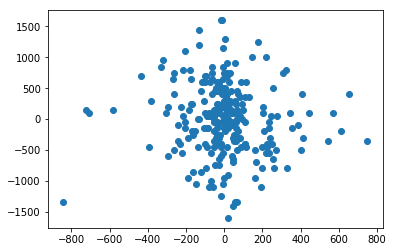

In [77]:
p = plt.scatter(과거의비트코인변화, 다음날주가변화)

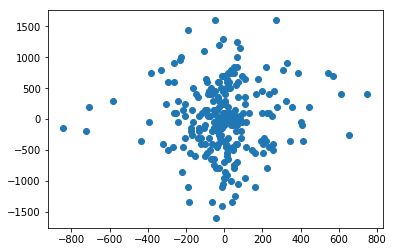

In [81]:
p = plt.scatter(비트코인변화, 주가변화)

In [82]:
np.corrcoef(과거의비트코인변화, 다음날주가변화) # 0에 가까우므로 거의 영향 없다.

array([[ 1.        , -0.07316871],
       [-0.07316871,  1.        ]])

In [87]:
input_seq = 60 #window
output_seq = 30
m = len(df) - (input_seq + output_seq) + 1
len(df), m

(244, 155)

In [138]:
#df = df/df.sum() # max 정규화
df = (df - df.min()) / (df.max() - df.min()) #min_max정규화
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['종가', 'Close**']] # 여러개를 꺼내고 싶으면 대괄호로 묶으면 된다.
    # print(x.shape, y.shape)
    x_list.append(x)
    y_list.append(y)

In [156]:
비트코인변화2 = df['Open*'] - df['Close**']
주가변화2 = df['시가'] - df['종가']
과거의비트코인변화2 = 비트코인변화2.iloc[:-1]
다음날주가변화2 = 주가변화2.iloc[1:]

In [139]:
len(x_list), type(x_list) # (155, 60, 12) 배열이 아니라 리스트이기 때문에 변환!! numpy array


(155, list)

In [140]:
np.stack(x_list, axis=0).shape # 축0으로 쌓는다.

(155, 60, 12)

In [141]:
x_3d=np.stack(x_list, axis=0)
y_3d=np.stack(y_list, axis=0)

In [142]:
x_3d.shape, y_3d.shape

((155, 60, 12), (155, 30, 2))

In [143]:
test_ratio=0.1
test_m = int(len(x_3d)*test_ratio)
test_m

15

In [144]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m,-1])
y_2d = np.reshape(y_3d, [m,-1])
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [145]:
#model 가중치를 작게 제약시킨다 > 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge

In [146]:
model = Ridge(normalize=True, solver='lsqr').fit(x_train, y_train) # 2차원 이하만 가능

In [147]:
model.score(x_train, y_train), model.score(x_test, y_test) #과적합 발생

(0.9767361862972054, -14.854996557273719)

In [148]:
korea_close_index=0
bitcoin_close_index=9

In [149]:
# 가장 최근 데이터
recent = df.iloc[-input_seq:]
recent.shape

(60, 12)

In [150]:
recent = np.reshape(np.array(recent), [1,-1])
recent.shape


(1, 720)

In [151]:
recent[:,:5]

array([[0.50541516, 0.20454545, 0.41463415, 0.51760563, 0.47292419]])

In [152]:
p = model.predict(recent)#미래 예측
p = np.reshape(p, [output_seq, -1])
p.shape

(30, 2)

In [153]:
p

array([[0.82846606, 0.85197675],
       [0.83686755, 0.84454567],
       [0.80535445, 0.83870967],
       [0.74785701, 0.86159543],
       [0.70322264, 0.88806056],
       [0.65517003, 0.83242864],
       [0.68295159, 0.79393146],
       [0.74717617, 0.74057111],
       [0.77644706, 0.6960331 ],
       [0.82169161, 0.70066397],
       [0.82342871, 0.7103672 ],
       [0.79052933, 0.70498656],
       [0.78019502, 0.72642521],
       [0.71785633, 0.7441244 ],
       [0.68633352, 0.76431732],
       [0.69877174, 0.93280537],
       [0.67496745, 1.06475134],
       [0.64249303, 1.17156201],
       [0.5562043 , 1.19012915],
       [0.45246021, 1.14376287],
       [0.38502142, 1.15684837],
       [0.41042091, 1.15851444],
       [0.42164824, 1.10447593],
       [0.43112005, 1.06191723],
       [0.39601188, 1.00411933],
       [0.35215686, 1.04104412],
       [0.33439696, 1.05649162],
       [0.27436681, 1.0515339 ],
       [0.2375275 , 1.02892778],
       [0.18932426, 1.01890334]])

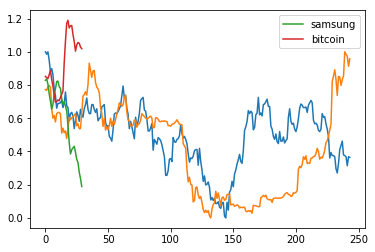

In [154]:
plt.plot(df['종가'].values)
plt.plot(df['Close**'].values)
plt.plot(p[:,0], label='samsung')
plt.plot(p[:,1], label='bitcoin')
plt.legend()

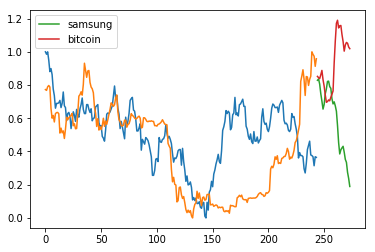

In [155]:
xm = len(df)
plt.plot(np.arange(xm), df['종가'].values)
plt.plot(np.arange(xm), df['Close**'].values)
plt.plot(np.arange(xm,xm+output_seq), p[:,0], label='samsung')
plt.plot(np.arange(xm,xm+output_seq), p[:,1], label='bitcoin')
plt.legend()